In [1]:
import pandas as pd
import numpy as np
import os

# 1. 데이터 파일이 있는 기본 경로와 읽어올 케이스 목록을 설정합니다.
# Windows 경로의 경우, 백슬래시(\) 문제를 피하기 위해 문자열 앞에 'r'을 붙여주는 것이 좋습니다.
base_path = r"C:\Users\spearlab05\Desktop\Galerkin ROM\Data"
traindatalist = [3, 5, 7, 9, 11, 13, 15, 17]

# 각 케이스(스냅샷)의 열 벡터를 저장할 리스트를 초기화합니다.
snapshot_columns = []

# 2. traindatalist에 있는 각 케이스 번호에 대해 반복합니다.
for case_num in traindatalist:
    # 파일 전체 경로를 생성합니다. (예: "C:\...\case3.csv")
    file_path = os.path.join(base_path, f"case{case_num}.csv")

    try:
        # CSV 파일을 pandas DataFrame으로 읽어옵니다.
        df = pd.read_csv(file_path)

        # 열 이름의 앞뒤 공백을 제거하여 일관성을 유지합니다.
        # '   x-coordinate' -> 'x-coordinate'
        df.columns = df.columns.str.strip()

        # 3. 필요한 데이터(pressure, x-velocity, y-velocity)를 추출하여 NumPy 배열로 변환합니다.
        pressure_data = df['pressure'].values
        x_velocity_data = df['x-velocity'].values
        y_velocity_data = df['y-velocity'].values

        # 4. 세 개의 데이터 배열을 수직으로 쌓아 하나의 스냅샷 열을 생성합니다.
        # (10000,) + (10000,) + (10000,) -> (30000,)
        single_snapshot_column = np.concatenate([pressure_data, x_velocity_data, y_velocity_data])

        # 생성된 스냅샷 열을 리스트에 추가합니다.
        snapshot_columns.append(single_snapshot_column)
        
        print(f"성공적으로 case {case_num}.csv 파일을 처리했습니다.")

    except FileNotFoundError:
        print(f"오류: {file_path} 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    except KeyError as e:
        print(f"오류: {file_path} 파일에서 다음 열을 찾을 수 없습니다: {e}. 열 이름을 확인해주세요.")

# 5. 리스트에 저장된 모든 스냅샷 열을 수평으로 쌓아 최종 스냅샷 행렬을 만듭니다.
if snapshot_columns:
    trainsnapshot = np.column_stack(snapshot_columns)

    # 최종 생성된 행렬의 형태(shape)와 일부 데이터를 출력하여 확인합니다.
    print("\n--- 최종 스냅샷 행렬 생성 완료 ---")
    print(f"Train Snapshot 행렬의 형태: {trainsnapshot.shape}")
    print("\nTrain Snapshot 행렬의 첫 5행 미리보기:")
    print(trainsnapshot[:5, :])
    
    # 생성된 행렬을 파일로 저장하여 추후 사용
    np.save('trainsnapshot.npy', trainsnapshot)
    print("\n'trainsnapshot.npy' 파일로 행렬을 저장했습니다.")

else:
    print("\n처리된 데이터가 없어 스냅샷 행렬을 생성하지 못했습니다.")

성공적으로 case 3.csv 파일을 처리했습니다.
성공적으로 case 5.csv 파일을 처리했습니다.
성공적으로 case 7.csv 파일을 처리했습니다.
성공적으로 case 9.csv 파일을 처리했습니다.
성공적으로 case 11.csv 파일을 처리했습니다.
성공적으로 case 13.csv 파일을 처리했습니다.
성공적으로 case 15.csv 파일을 처리했습니다.
성공적으로 case 17.csv 파일을 처리했습니다.

--- 최종 스냅샷 행렬 생성 완료 ---
Train Snapshot 행렬의 형태: (30000, 8)

Train Snapshot 행렬의 첫 5행 미리보기:
[[0.39185607 0.55809704 0.71640546 0.86618796 1.01186255 1.15161121
  1.28903936 1.42213763]
 [0.39187865 0.55814764 0.71651113 0.86634808 1.01209507 1.15193334
  1.2894646  1.42267567]
 [0.39189506 0.55813454 0.71641868 0.86612132 1.01168336 1.15125331
  1.28842172 1.42118046]
 [0.39192263 0.55824557 0.71669211 0.86664758 1.01254455 1.15255344
  1.29027519 1.42368994]
 [0.39191604 0.5581814  0.71651439 0.8662854  1.01190783 1.15155613
  1.28882032 1.42168215]]

'trainsnapshot.npy' 파일로 행렬을 저장했습니다.


✅ 스냅샷 행렬 로드 완료. 형태: (30000, 8)
✅ 평균 제거 완료. 변동 행렬 형태: (30000, 8)

--- SVD 분해 완료 ---
U 행렬 (POD 모드) 형태: (30000, 8)
S 벡터 (특이값) 형태: (8,)
Vt 행렬 형태: (8, 8)

최대 가능한 모드의 수: 8

--- 에너지 분석 결과 ---
총 에너지(분산): 5751.7497
모드 1: 에너지 비율 = 0.9866, 누적 에너지 = 0.9866
모드 2: 에너지 비율 = 0.0134, 누적 에너지 = 1.0000
모드 3: 에너지 비율 = 0.0000, 누적 에너지 = 1.0000
모드 4: 에너지 비율 = 0.0000, 누적 에너지 = 1.0000
모드 5: 에너지 비율 = 0.0000, 누적 에너지 = 1.0000
모드 6: 에너지 비율 = 0.0000, 누적 에너지 = 1.0000
모드 7: 에너지 비율 = 0.0000, 누적 에너지 = 1.0000
모드 8: 에너지 비율 = 0.0000, 누적 에너지 = 1.0000

✅ 전체 에너지의 99.999% 이상을 설명하기 위한 모드의 수 k = 3개 입니다.

--- Truncated SVD 완료 ---
축소된 U_k (POD 모드) 형태: (30000, 3)
축소된 S_k (특이값) 형태: (3,)
축소된 Vt_k 형태: (3, 8)


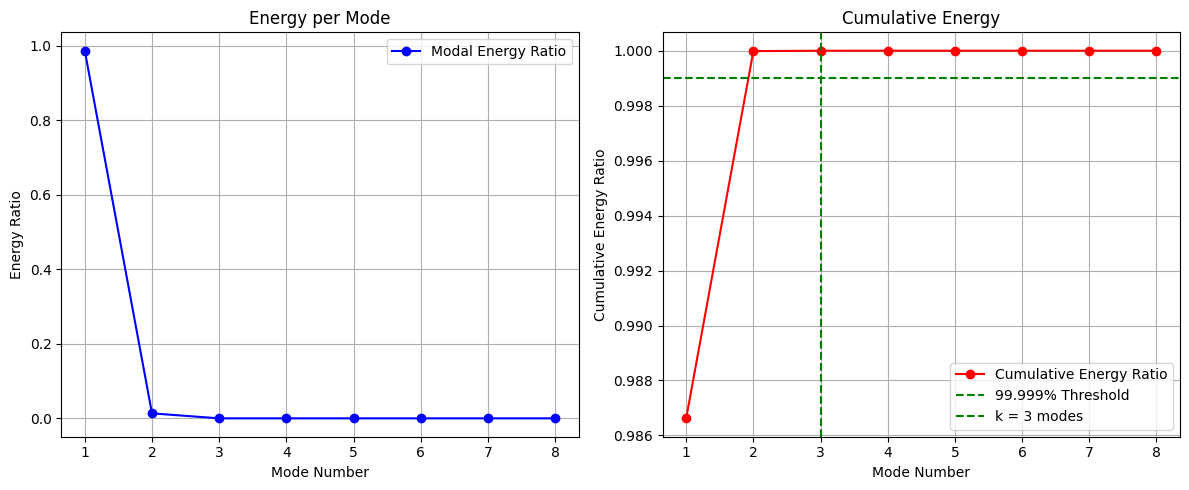

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 로드
try:
    # 이전 단계에서 저장한 스냅샷 행렬을 불러옵니다.
    snapshot_matrix = np.load('trainsnapshot.npy')
    print(f"✅ 스냅샷 행렬 로드 완료. 형태: {snapshot_matrix.shape}")
except FileNotFoundError:
    print("❌ 'trainsnapshot.npy' 파일을 찾을 수 없습니다. 이전 단계가 올바르게 실행되었는지 확인해주세요.")
    # 파일이 없는 경우를 대비해 임의의 데이터 생성 (실제 실행 시에는 위 코드가 실행되어야 함)
    snapshot_matrix = np.random.rand(30000, 8) 
    print("임의의 데이터로 분석을 계속합니다.")

# 2. 평균 제거 (Mean Subtraction)
# 각 스냅샷(열)들의 평균을 계산합니다. axis=1은 행 방향으로의 평균을 의미합니다.
mean_snapshot = np.mean(snapshot_matrix, axis=1, keepdims=True)
fluctuation_matrix = snapshot_matrix - mean_snapshot
print(f"✅ 평균 제거 완료. 변동 행렬 형태: {fluctuation_matrix.shape}")


# 3. SVD 수행
# U: 좌측 특이행렬 (POD 모드), S: 특이값 벡터, Vt: 우측 특이행렬의 전치
# full_matrices=False 옵션은 계산 효율을 위해 축소된 형태의 U와 Vt를 반환합니다.
U, S, Vt = np.linalg.svd(fluctuation_matrix, full_matrices=False)

print("\n--- SVD 분해 완료 ---")
print(f"U 행렬 (POD 모드) 형태: {U.shape}")
print(f"S 벡터 (특이값) 형태: {S.shape}")
print(f"Vt 행렬 형태: {Vt.shape}")


# 4. 에너지 분석 및 최적 모드 수 k 결정
# 최대 가능한 모드의 수는 특이값의 개수와 같습니다.
max_modes = len(S)
print(f"\n최대 가능한 모드의 수: {max_modes}")

# 특이값의 제곱은 각 모드의 에너지에 해당합니다.
modal_energy = S**2
total_energy = np.sum(modal_energy)

# 각 모드가 차지하는 에너지 비율과 누적 에너지 비율을 계산합니다.
energy_ratio = modal_energy / total_energy
cumulative_energy_ratio = np.cumsum(energy_ratio)

# 데이터를 충분히 설명할 모드 수 k 결정 (예: 누적 에너지 99.9%)
k = np.argmax(cumulative_energy_ratio >= 0.99999) + 1

print(f"\n--- 에너지 분석 결과 ---")
print(f"총 에너지(분산): {total_energy:.4f}")
for i in range(max_modes):
    print(f"모드 {i+1}: 에너지 비율 = {energy_ratio[i]:.4f}, 누적 에너지 = {cumulative_energy_ratio[i]:.4f}")

print(f"\n✅ 전체 에너지의 99.999% 이상을 설명하기 위한 모드의 수 k = {k}개 입니다.")


# 5. Truncated SVD 수행 (모드 축소)
# 결정된 k개를 사용하여 행렬들을 잘라냅니다.
U_k = U[:, :k]             # POD 모드 (기저)
S_k = S[:k]               # 축소된 특이값
Vt_k = Vt[:k, :]           # 축소된 시간 계수 행렬

print("\n--- Truncated SVD 완료 ---")
print(f"축소된 U_k (POD 모드) 형태: {U_k.shape}")
print(f"축소된 S_k (특이값) 형태: {S_k.shape}")
print(f"축소된 Vt_k 형태: {Vt_k.shape}")


# 6. 에너지 분석 결과 시각화
plt.figure(figsize=(12, 5))

# Plot 1: 각 모드의 에너지 비율
plt.subplot(1, 2, 1)
plt.plot(range(1, max_modes + 1), energy_ratio, 'bo-', label='Modal Energy Ratio')
plt.title('Energy per Mode')
plt.xlabel('Mode Number')
plt.ylabel('Energy Ratio')
plt.grid(True)
plt.legend()

# Plot 2: 누적 에너지 비율
plt.subplot(1, 2, 2)
plt.plot(range(1, max_modes + 1), cumulative_energy_ratio, 'ro-', label='Cumulative Energy Ratio')
plt.title('Cumulative Energy')
plt.xlabel('Mode Number')
plt.ylabel('Cumulative Energy Ratio')
# 99.9% 기준선 표시
plt.axhline(y=0.999, color='g', linestyle='--', label='99.999% Threshold')
plt.axvline(x=k, color='g', linestyle='--', label=f'k = {k} modes')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
# 이전 셀에서 U_k, k 변수가 계산되었다고 가정합니다.
# 만약 이 셀만 따로 실행한다면, 아래 두 줄의 주석을 해제하여 임의의 데이터로 테스트하세요.
# k = 7
# U_k = np.random.rand(30000, k)

# 데이터 포인트의 수(노드의 수)를 정의합니다.
n_points = 10000

# 1. POD 모드(U_k)를 각 변수별 모드로 분리합니다.
# 첫 10000개 행: 압력(Pressure) 모드
U_pressure = U_k[0:n_points, :]

# 다음 10000개 행: x-속도(u-velocity) 모드
U_u = U_k[n_points : 2 * n_points, :]

# 마지막 10000개 행: y-속도(v-velocity) 모드
U_v = U_k[2 * n_points : 3 * n_points, :]


# 2. 분리된 각 모드 행렬의 형태를 출력하여 확인합니다.
print("--- POD 모드 분리 완료 ---")
print(f"✅ 압력 모드(U_pressure) 형태: {U_pressure.shape}")
print(f"✅ u-속도 모드(U_u) 형태: {U_u.shape}")
print(f"✅ v-속도 모드(U_v) 형태: {U_v.shape}")

--- POD 모드 분리 완료 ---
✅ 압력 모드(U_pressure) 형태: (10000, 3)
✅ u-속도 모드(U_u) 형태: (10000, 3)
✅ v-속도 모드(U_v) 형태: (10000, 3)


In [4]:
import numpy as np
# from scipy.interpolate import griddata # 만약 비정형 격자라면 griddata 등을 사용

# --- 사전 준비: 공간 미분 계산 ---
# 이 단계는 한 번만 수행하면 됩니다.

# 1. 원본 데이터의 좌표 정보를 불러옵니다. (실제 경로와 파일명으로 수정 필요)
# 여기서는 예시로 첫 번째 케이스 파일에서 좌표를 불러오는 것으로 가정합니다.
try:
    coords_df = pd.read_csv(r"C:\Users\spearlab05\Desktop\Galerkin ROM\Data\case3.csv")
    coords_df.columns = coords_df.columns.str.strip()
    # (10000, 2) 형태의 numpy 배열로 변환
    coords = coords_df[['x-coordinate', 'y-coordinate']].values
    print("✅ 좌표 정보 로드 완료.")
except FileNotFoundError:
    print("❌ 좌표 파일(case3.csv)을 찾을 수 없습니다. 임의의 격자로 대체합니다.")
    # 임의의 100x100 격자 생성
    n_grid = 100
    x = np.linspace(0, 1, n_grid)
    y = np.linspace(0, 1, n_grid)
    xv, yv = np.meshgrid(x, y)
    coords = np.vstack([xv.ravel(), yv.ravel()]).T

# 2. 각 POD 모드의 공간 미분을 계산하는 함수 (예시: 2차 중앙 유한차분)
# 실제 문제의 격자 형태(정형/비정형)에 따라 적합한 수치 미분 방법을 선택해야 합니다.
# 여기서는 간단하게 numpy.gradient를 사용하여 정형 격자라고 가정하고 미분을 수행합니다.
def compute_derivatives(modes, n_points=10000):
    # 1D 모드 데이터를 2D 격자 데이터로 재구성 (100x100 격자 가정)
    n_grid = int(np.sqrt(n_points))
    if n_grid * n_grid != n_points:
        raise ValueError("데이터 포인트 수가 제곱수가 아니어서 2D 격자로 변환할 수 없습니다.")
    
    modes_2d = modes.reshape(n_grid, n_grid, -1)
    
    # np.gradient로 미분 계산 (dx, dy는 실제 격자 간격으로 설정)
    grad_y, grad_x = np.gradient(modes_2d, axis=(0, 1))
    
    # 2차 미분 (Laplacian)
    grad_y_y, grad_x_y = np.gradient(grad_y, axis=(0,1))
    grad_y_x, grad_x_x = np.gradient(grad_x, axis=(0,1))
    laplacian = grad_x_x + grad_y_y
    
    # 다시 1D 벡터 형태로 변환하여 반환
    return (grad_x.reshape(n_points, -1), 
            grad_y.reshape(n_points, -1), 
            laplacian.reshape(n_points, -1))

# 각 변수 모드에 대한 1차, 2차 미분 행렬 계산
Uu_dx, Uu_dy, Uu_lap = compute_derivatives(U_u)
Uv_dx, Uv_dy, Uv_lap = compute_derivatives(U_v)
Up_dx, Up_dy, _ = compute_derivatives(U_pressure) # 압력은 라플라시안 불필요

print("✅ 모든 POD 모드의 공간 미분 계산 완료.")

# --- 잔차 계산 함수 정의 ---
def calculate_residuals(a, Re, U_u, U_v, U_p, Uu_dx, Uu_dy, Uv_dx, Uv_dy, Up_dx, Up_dy, Uu_lap, Uv_lap):
    """
    주어진 모드 계수(a)와 Re 수에 대해 Navier-Stokes 잔차를 계산합니다.
    """
    # 1. Σ a_i * Φ_i 와 같이 각 필드를 재구성 (행렬-벡터 곱으로 간단히 계산)
    u = U_u @ a
    v = U_v @ a
    
    dudx = Uu_dx @ a
    dudy = Uu_dy @ a
    dvdx = Uv_dx @ a
    dvdy = Uv_dy @ a
    dpdx = Up_dx @ a
    dpdy = Up_dy @ a
    
    lap_u = Uu_lap @ a
    lap_v = Uv_lap @ a

    # 2. 잔차 방정식 계산
    Rc = dudx + dvdy
    Ru = u * dudx + v * dudy + dpdx - (1/Re) * lap_u
    Rv = u * dvdx + v * dvdy + dpdy - (1/Re) * lap_v
    
    return Rc, Ru, Rv

# --- 함수 테스트 ---


✅ 좌표 정보 로드 완료.
✅ 모든 POD 모드의 공간 미분 계산 완료.


In [5]:
# 1. 학습 데이터의 Re 값을 리스트로 정리합니다.
Re_trainlist = [100 + (case_num - 1) * 50 for case_num in traindatalist]

print("--- 학습 데이터 정보 ---")
print(f"사용된 케이스: {traindatalist}")
print(f"각 케이스의 Re: {Re_trainlist}")


# 2. 테스트할 특정 학습 데이터를 선택합니다. (예: 첫 번째 데이터, case 3)
test_idx = 0 
target_case = traindatalist[test_idx]
Re_test = Re_trainlist[test_idx]

# SVD 결과(Vt_k)에서 해당 케이스의 실제 모드 계수 'a'를 가져옵니다.
# Vt_k의 test_idx번째 열이 바로 test_idx번째 스냅샷의 계수 벡터입니다.
a_test = Vt_k[:, test_idx]

print(f"\n--- 잔차 계산 함수 테스트 (실제 데이터 기반) ---")
print(f"테스트 대상: case {target_case} (Re = {Re_test})")
print(f"해당 케이스의 모드 계수 a (첫 3개): {a_test[:3]}")


# 3. 실제 Re와 a 값을 사용하여 잔차를 계산합니다.
Rc, Ru, Rv = calculate_residuals(a_test, Re_test, U_u, U_v, U_pressure,
                                 Uu_dx, Uu_dy, Uv_dx, Uv_dy, 
                                 Up_dx, Up_dy, Uu_lap, Uv_lap)

print(f"\n 잔차 계산 완료.")
print(f"Rc (연속) 잔차 벡터의 형태: {Rc.shape}")
print(f"Ru (x-모멘텀) 잔차 벡터의 형태: {Ru.shape}")
print(f"Rv (y-모멘텀) 잔차 벡터의 형태: {Rv.shape}")


--- 학습 데이터 정보 ---
사용된 케이스: [3, 5, 7, 9, 11, 13, 15, 17]
각 케이스의 Re: [200, 300, 400, 500, 600, 700, 800, 900]

--- 잔차 계산 함수 테스트 (실제 데이터 기반) ---
테스트 대상: case 3 (Re = 200)
해당 케이스의 모드 계수 a (첫 3개): [ 0.5825751   0.5116012  -0.45714041]

 잔차 계산 완료.
Rc (연속) 잔차 벡터의 형태: (10000,)
Ru (x-모멘텀) 잔차 벡터의 형태: (10000,)
Rv (y-모멘텀) 잔차 벡터의 형태: (10000,)


In [6]:
import numpy as np
from tqdm import tqdm

# --- 이 스크립트를 실행하기 전, 이전 단계의 변수들이 메모리에 로드되어 있어야 합니다 ---
# k, U_u, U_v, U_pressure, Uu_dx, Uu_dy, ... , Uv_lap

print("--- [Offline] 계산 시작 ---")
print("시스템 텐서 및 행렬을 계산하여 파일로 저장합니다.")
print("시간이 다소 소요될 수 있습니다...")

# k: 모드의 수 (차원)
k = U_u.shape[1]

# 시스템 텐서/행렬 초기화
L_tensor = np.zeros((k, k, k))
C_matrix = np.zeros((k, k))
P_matrix = np.zeros((k, k))
V_matrix = np.zeros((k, k))

# k x k x k 루프 (비선형 텐서 L)
for i in tqdm(range(k), desc="Calculating L_tensor"):
    for j in range(k):
        for k_idx in range(k):
            integrand_L_u = (U_u[:, i] * Uu_dx[:, j] + U_v[:, i] * Uu_dy[:, j]) * U_u[:, k_idx]
            integrand_L_v = (U_u[:, i] * Uv_dx[:, j] + U_v[:, i] * Uv_dy[:, j]) * U_v[:, k_idx]
            L_tensor[k_idx, i, j] = np.sum(integrand_L_u + integrand_L_v)

# k x k 루프 (선형 행렬 C, P, V)
for i in tqdm(range(k), desc="Calculating C, P, V matrices"):
    for k_idx in range(k):
        integrand_C = (Uu_dx[:, i] + Uv_dy[:, i]) * U_pressure[:, k_idx]
        C_matrix[k_idx, i] = np.sum(integrand_C)
        
        integrand_P_u = Up_dx[:, i] * U_u[:, k_idx]
        integrand_P_v = Up_dy[:, i] * U_v[:, k_idx]
        P_matrix[k_idx, i] = np.sum(integrand_P_u + integrand_P_v)
        
        integrand_V_u = Uu_lap[:, i] * U_u[:, k_idx]
        integrand_V_v = Uv_lap[:, i] * U_v[:, k_idx]
        V_matrix[k_idx, i] = np.sum(integrand_V_u + integrand_V_v)

# (기존 offline_calculation.py 코드의 마지막 줄을 아래와 같이 수정)

# 계산된 행렬과 "모드"를 하나의 파일로 저장
np.savez_compressed('rom_system_matrices.npz', 
                    L=L_tensor, 
                    C=C_matrix, 
                    P=P_matrix, 
                    V=V_matrix,
                    U_p=U_pressure, # 압력 모드 추가
                    U_u=U_u,        # u-속도 모드 추가
                    U_v=U_v)        # v-속도 모드 추가

print("\n--- [Offline] 계산 완료 ---")
print("✅ 시스템 행렬과 POD 모드를 'rom_system_matrices.npz' 파일에 성공적으로 저장했습니다.")

--- [Offline] 계산 시작 ---
시스템 텐서 및 행렬을 계산하여 파일로 저장합니다.
시간이 다소 소요될 수 있습니다...


Calculating C, P, V matrices: 100%|██████████| 3/3 [00:00<00:00, 3439.83it/s]


--- [Offline] 계산 완료 ---
✅ 시스템 행렬과 POD 모드를 'rom_system_matrices.npz' 파일에 성공적으로 저장했습니다.


✅ Offline 계산 파일('rom_system_matrices.npz') 로드 완료.
✅ Re = 450.0에 대한 시스템 행렬 M 조립 완료.
scipy.optimize.fsolve를 사용하여 비선형 방정식을 풉니다...
✅ Re = 450.0에 대한 모드 계수 a를 성공적으로 찾았습니다.
Solution a =  [0. 0. 0.]
✅ 전체 유동장 복원 완료.
❌ 'case1.csv' 파일이 필요합니다. 좌표 정보를 읽을 수 없습니다.
✅ pivot을 사용하여 2D 격자 데이터 생성 완료.


C:\Users\spearlab05\AppData\Local\Temp\ipykernel_19880\531057774.py:115: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\spearlab05\AppData\Local\Temp\ipykernel_19880\531057774.py:115: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\spearlab05\AppData\Local\Temp\ipykernel_19880\531057774.py:115: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\spearlab05\AppData\Local\Temp\ipykernel_19880\531057774.py:115: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\spearlab05\AppData\Local\Temp\ipykernel_19880\531057774.py:115: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03,

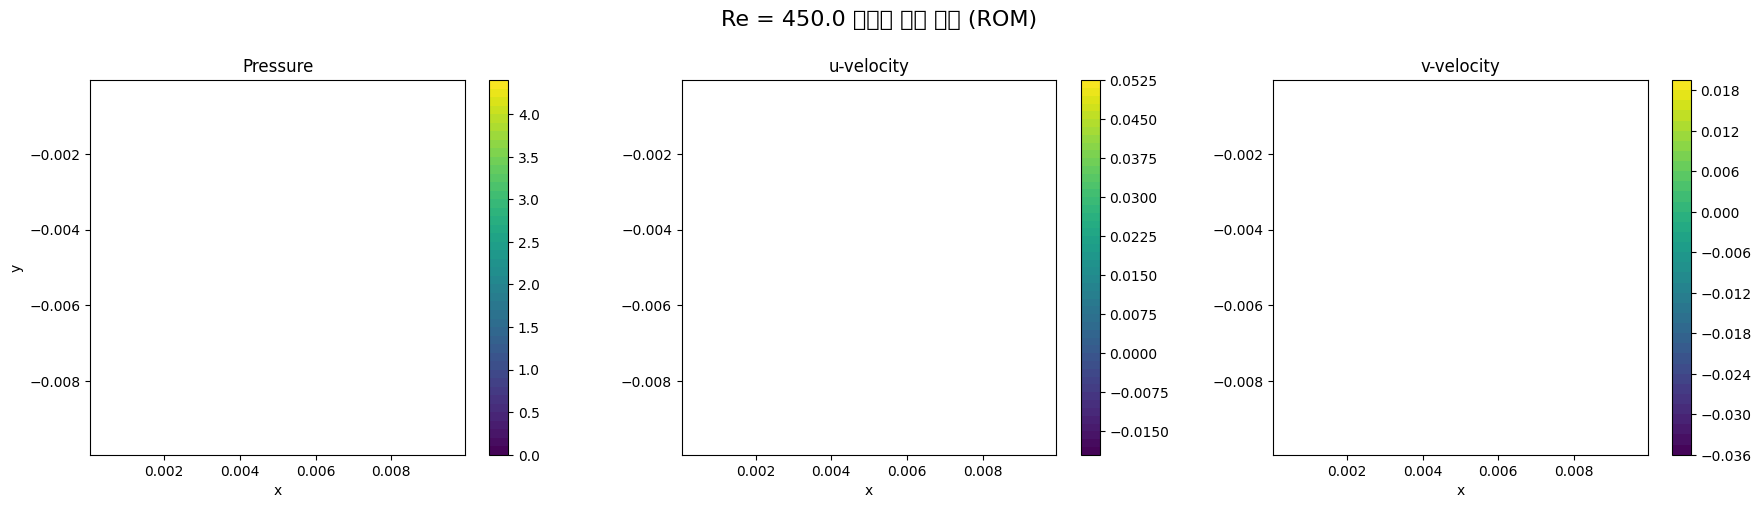

: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# --- [Online] 예측 및 시각화 통합 코드 ---

# 1. Offline 단계에서 저장한 모든 데이터를 불러옵니다.
try:
    # allow_pickle=True 옵션으로 파일 로드 오류 방지
    rom_data = np.load('rom_system_matrices.npz', allow_pickle=True)
    L = rom_data['L']
    C = rom_data['C']
    P = rom_data['P']
    V = rom_data['V']
    U_pressure = rom_data['U_p']
    U_u = rom_data['U_u']
    U_v = rom_data['U_v']
    k = C.shape[0]
    print("✅ Offline 계산 파일('rom_system_matrices.npz') 로드 완료.")
except FileNotFoundError:
    print("❌ 'rom_system_matrices.npz' 파일을 찾을 수 없습니다. 수정된 Offline 코드를 먼저 실행해주세요.")
    exit()

# 2. 사용자로부터 Re 값을 입력받습니다.
while True:
    try:
        Re_online = float(input("예측할 Reynolds 수를 입력하세요 (예: 450): "))
        break
    except ValueError:
        print("올바른 숫자를 입력해주세요.")

# 3. Online 계산: 입력받은 Re로 M 행렬을 빠르게 조립
M = C + P - (1 / Re_online) * V
print(f"✅ Re = {Re_online}에 대한 시스템 행렬 M 조립 완료.")

# 4. ROM 방정식을 정의합니다.
def rom_equation(a):
    nonlinear_term = np.einsum('kij,i,j->k', L, a, a)
    linear_term = M @ a
    return nonlinear_term + linear_term

# 5. 비선형 방정식 시스템을 풉니다.
initial_guess = np.zeros(k)
print("scipy.optimize.fsolve를 사용하여 비선형 방정식을 풉니다...")
solution_a, infodict, ier, mesg = fsolve(rom_equation, initial_guess, full_output=True)

# 6. 결과 확인 및 유동장 복원/시각화
if ier == 1:
    print(f"✅ Re = {Re_online}에 대한 모드 계수 a를 성공적으로 찾았습니다.")
    print("Solution a = ", solution_a)

    # a. 평균장 준비
    try:
        snapshot_matrix = np.load('trainsnapshot.npy', allow_pickle=True)
        mean_snapshot = np.mean(snapshot_matrix, axis=1)
    except FileNotFoundError:
        print("❌ 'trainsnapshot.npy' 파일이 필요합니다. 평균장을 계산할 수 없습니다.")
        exit()
        
    # b. 전체 유동장 복원
    n_points = 10000
    p_reconstructed = mean_snapshot[0:n_points] + (U_pressure @ solution_a)
    u_reconstructed = mean_snapshot[n_points:2*n_points] + (U_u @ solution_a)
    v_reconstructed = mean_snapshot[2*n_points:3*n_points] + (U_v @ solution_a)
    print("✅ 전체 유동장 복원 완료.")
    
    # c. pivot을 이용한 2D 격자 데이터 생성
    try:
        coords_df = pd.read_csv('case1.csv')
    except FileNotFoundError:
        print("❌ 'case1.csv' 파일이 필요합니다. 좌표 정보를 읽을 수 없습니다.")
        exit()
        
    coords_df.columns = coords_df.columns.str.strip()
    
    plot_df = coords_df[['x-coordinate', 'y-coordinate']].copy()
    plot_df['pressure'] = p_reconstructed
    plot_df['u_velocity'] = u_reconstructed
    plot_df['v_velocity'] = v_reconstructed
    
    p_grid = plot_df.pivot(index='y-coordinate', columns='x-coordinate', values='pressure')
    u_grid = plot_df.pivot(index='y-coordinate', columns='x-coordinate', values='u_velocity')
    v_grid = plot_df.pivot(index='y-coordinate', columns='x-coordinate', values='v_velocity')
    
    grid_x, grid_y = np.meshgrid(p_grid.columns, p_grid.index)
    print("✅ pivot을 사용하여 2D 격자 데이터 생성 완료.")

    # d. 컨투어 플롯 그리기
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Re = {Re_online} 유동장 예측 결과 (ROM)', fontsize=16)

    # Pressure
    cp1 = axes[0].contourf(grid_x, grid_y, p_grid, levels=50, cmap='viridis')
    fig.colorbar(cp1, ax=axes[0])
    axes[0].set_title('Pressure')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_aspect('equal', adjustable='box')

    # u-velocity
    cp2 = axes[1].contourf(grid_x, grid_y, u_grid, levels=50, cmap='viridis')
    fig.colorbar(cp2, ax=axes[1])
    axes[1].set_title('u-velocity')
    axes[1].set_xlabel('x')
    axes[1].set_aspect('equal', adjustable='box')

    # v-velocity
    cp3 = axes[2].contourf(grid_x, grid_y, v_grid, levels=50, cmap='viridis')
    fig.colorbar(cp3, ax=axes[2])
    axes[2].set_title('v-velocity')
    axes[2].set_xlabel('x')
    axes[2].set_aspect('equal', adjustable='box')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print(f"❌ Re = {Re_online}에 대한 해를 찾는 데 실패했습니다. Solver 메시지:", mesg)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 7. 유동장 복원 및 시각화 (수정된 최종 버전) ---

if ier == 1: # 해를 성공적으로 찾은 경우에만 진행
    
    # a. 평균장 준비
    try:
        snapshot_matrix = np.load('trainsnapshot.npy', allow_pickle=True)
        mean_snapshot = np.mean(snapshot_matrix, axis=1)
    except FileNotFoundError:
        print("❌ 'trainsnapshot.npy' 파일이 필요합니다. 평균장을 계산할 수 없습니다.")
        exit()
    
    # Offline 파일에서 POD 모드 불러오기
    U_pressure = rom_data['U_p']
    U_u = rom_data['U_u']
    U_v = rom_data['U_v']
        
    # b. 전체 유동장 복원
    n_points = 10000
    p_reconstructed = mean_snapshot[0:n_points] + (U_pressure @ solution_a)
    u_reconstructed = mean_snapshot[n_points:2*n_points] + (U_u @ solution_a)
    v_reconstructed = mean_snapshot[2*n_points:3*n_points] + (U_v @ solution_a)
    print("✅ 전체 유동장 복원 완료.")
    
    # c. 시각화를 위해 좌표 정보와 복원된 데이터를 DataFrame으로 결합
    try:
        coords_df = pd.read_csv('case1.csv')
    except FileNotFoundError:
        print("❌ 'case1.csv' 파일이 필요합니다. 좌표 정보를 읽을 수 없습니다.")
        exit()
        
    coords_df.columns = coords_df.columns.str.strip()
    
    plot_df = coords_df[['x-coordinate', 'y-coordinate']].copy()
    plot_df['pressure'] = p_reconstructed
    plot_df['u_velocity'] = u_reconstructed
    plot_df['v_velocity'] = v_reconstructed
    
    # d. pivot을 사용하여 2D 격자 데이터 생성
    p_grid = plot_df.pivot(index='y-coordinate', columns='x-coordinate', values='pressure')
    u_grid = plot_df.pivot(index='y-coordinate', columns='x-coordinate', values='u_velocity')
    v_grid = plot_df.pivot(index='y-coordinate', columns='x-coordinate', values='v_velocity')
    
    # contourf를 위한 격자 좌표 생성
    grid_x, grid_y = np.meshgrid(p_grid.columns, p_grid.index)
    print("✅ pivot을 사용하여 2D 격자 데이터 생성 완료.")

    # e. 컨투어 플롯 그리기
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Re = {Re_online} 유동장 예측 결과 (ROM)', fontsize=16)

    # Pressure
    cp1 = axes[0].contourf(grid_x, grid_y, p_grid, levels=50, cmap='viridis')
    fig.colorbar(cp1, ax=axes[0])
    axes[0].set_title('Pressure')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_aspect('equal', adjustable='box')

    # u-velocity
    cp2 = axes[1].contourf(grid_x, grid_y, u_grid, levels=50, cmap='viridis')
    fig.colorbar(cp2, ax=axes[1])
    axes[1].set_title('u-velocity')
    axes[1].set_xlabel('x')
    axes[1].set_aspect('equal', adjustable='box')

    # v-velocity
    cp3 = axes[2].contourf(grid_x, grid_y, v_grid, levels=50, cmap='viridis')
    fig.colorbar(cp3, ax=axes[2])
    axes[2].set_title('v-velocity')
    axes[2].set_xlabel('x')
    axes[2].set_aspect('equal', adjustable='box')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("해를 찾지 못했기 때문에 유동장을 복원하고 시각화할 수 없습니다.")